<a href="https://colab.research.google.com/github/osebasp/ML-Applications-for-Actuarial-Science/blob/main/ml_apps_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este documento se presentará el avance del proyecto siguiendo la metodología CRISP-DM. Esto se complementa con una serie de documentos disponibles para la revisión en el entorno de GitHub.

El objetivo de este cuaderno es mostrar el desarrollo de la metodología de CRISP-DM para la ejecución del proyecto.

Este ejercicio se realizará con lenguaje de programación R.

A continuación, se muestra la primera versión de la fase de entendimiento de los datos.

En primer lugar, se muestran las librerías usadas

In [ ]:
library(tibble)
library(readr)
library(dplyr)
library(knitr)
library(tidyr)
install.packages("kableExtra")
library(kableExtra)
library(ggplot2)
install.packages("ggplot2")
library(ggplot2)




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘webshot’



Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



A continuación se muestra la forma de importación de los datos para la base comauto_pos:

In [ ]:
AutoComercial<-read_csv("comauto_pos.csv",col_names = TRUE)

Rows: 15800 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): GRNAME
dbl (12): GRCODE, AccidentYear, DevelopmentYear, DevelopmentLag, IncurLoss_C...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Un análisis preliminar de los datos muestra lo siguiente:

In [ ]:
str(AutoComercial)

spc_tbl_ [15,800 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ GRCODE           : num [1:15800] 266 266 266 266 266 266 266 266 266 266 ...
 $ GRNAME           : chr [1:15800] "Public Underwriters Grp" "Public Underwriters Grp" "Public Underwriters Grp" "Public Underwriters Grp" ...
 $ AccidentYear     : num [1:15800] 1988 1988 1988 1988 1988 ...
 $ DevelopmentYear  : num [1:15800] 1988 1989 1990 1991 1992 ...
 $ DevelopmentLag   : num [1:15800] 1 2 3 4 5 6 7 8 9 10 ...
 $ IncurLoss_C      : num [1:15800] 0 0 0 0 0 0 0 0 0 0 ...
 $ CumPaidLoss_C    : num [1:15800] 0 0 0 0 0 0 0 0 0 0 ...
 $ BulkLoss_C       : num [1:15800] 0 0 0 0 0 0 0 0 0 0 ...
 $ EarnedPremDIR_C  : num [1:15800] 0 0 0 0 0 0 0 0 0 0 ...
 $ EarnedPremCeded_C: num [1:15800] 0 0 0 0 0 0 0 0 0 0 ...
 $ EarnedPremNet_C  : num [1:15800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Single           : num [1:15800] 0 0 0 0 0 0 0 0 0 0 ...
 $ PostedReserve97_C: num [1:15800] 932 932 932 932 932 932 932 932 932 932 ...
 - attr(*, "spec")=
  

Los formatos lucen de la siguiente manera:

In [ ]:
formatos <- AutoComercial %>%
  summarize_all(list(format = ~ toString(class(.))))
View(formatos)

GRCODE_format,GRNAME_format,AccidentYear_format,DevelopmentYear_format,DevelopmentLag_format,IncurLoss_C_format,CumPaidLoss_C_format,BulkLoss_C_format,EarnedPremDIR_C_format,EarnedPremCeded_C_format,EarnedPremNet_C_format,Single_format,PostedReserve97_C_format
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
numeric,character,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


La única variable categórica es GRCODE que se compone de la siguiente manera:

In [ ]:
elementos <- unique(AutoComercial$GRNAME)
elementos_distintos_df <- data.frame(Compañía = elementos)
View(elementos_distintos_df)

Compañía
<chr>
Public Underwriters Grp
California Cas Grp
Celina Mut Grp
Federal Ins Co Grp
Buckeye Ins Grp
Employers Mut Co Of Des Moines
FM Global
Farm Bureau Of MI Grp
West Bend Mut Ins Grp


Las estadisticas descriptivas se ven así:

In [ ]:
EstDesc<-summary(AutoComercial)
EstDesc

     GRCODE         GRNAME           AccidentYear  DevelopmentYear
 Min.   :  266   Length:15800       Min.   :1988   Min.   :1988   
 1st Qu.: 8281   Class :character   1st Qu.:1990   1st Qu.:1994   
 Median :15303   Mode  :character   Median :1992   Median :1997   
 Mean   :18655                      Mean   :1992   Mean   :1997   
 3rd Qu.:28886                      3rd Qu.:1995   3rd Qu.:2000   
 Max.   :44598                      Max.   :1997   Max.   :2006   
 DevelopmentLag  IncurLoss_C     CumPaidLoss_C         BulkLoss_C      
 Min.   : 1.0   Min.   :  -253   Min.   :  -253.00   Min.   : -1395.0  
 1st Qu.: 3.0   1st Qu.:     5   1st Qu.:     2.75   1st Qu.:     0.0  
 Median : 5.5   Median :   315   Median :   229.00   Median :     0.0  
 Mean   : 5.5   Mean   :  5156   Mean   :  4190.97   Mean   :   357.4  
 3rd Qu.: 8.0   3rd Qu.:  1965   3rd Qu.:  1535.25   3rd Qu.:    26.0  
 Max.   :10.0   Max.   :256434   Max.   :244280.00   Max.   :105923.0  
 EarnedPremDIR_C    EarnedP

A continuación, se presenta un análisis exploratorio de las cifras relacionadas a los siniestros que representan un insumo importante dentro del IBNR con base en el año de desarrollo:

In [ ]:
resumen_por_año <- AutoComercial %>%
  group_by(DevelopmentYear) %>%
  summarise(Incurred_Loss = sum(IncurLoss_C), Cummulate_Paid_Loss = sum(CumPaidLoss_C))

resumen_por_año<-as.data.frame(resumen_por_año)
View(resumen_por_año)


DevelopmentYear,Incurred_Loss,Cummulate_Paid_Loss
<dbl>,<dbl>,<dbl>
1988,600839,154058
1989,1309342,500772
1990,2081606,987503
1991,2859155,1587324
1992,3674297,2234030
1993,4522315,2982593
1994,5404961,3781285
1995,6311670,4646588
1996,7174345,5562037


Se tienen las gráficas para el análisis exploratorio de la información:

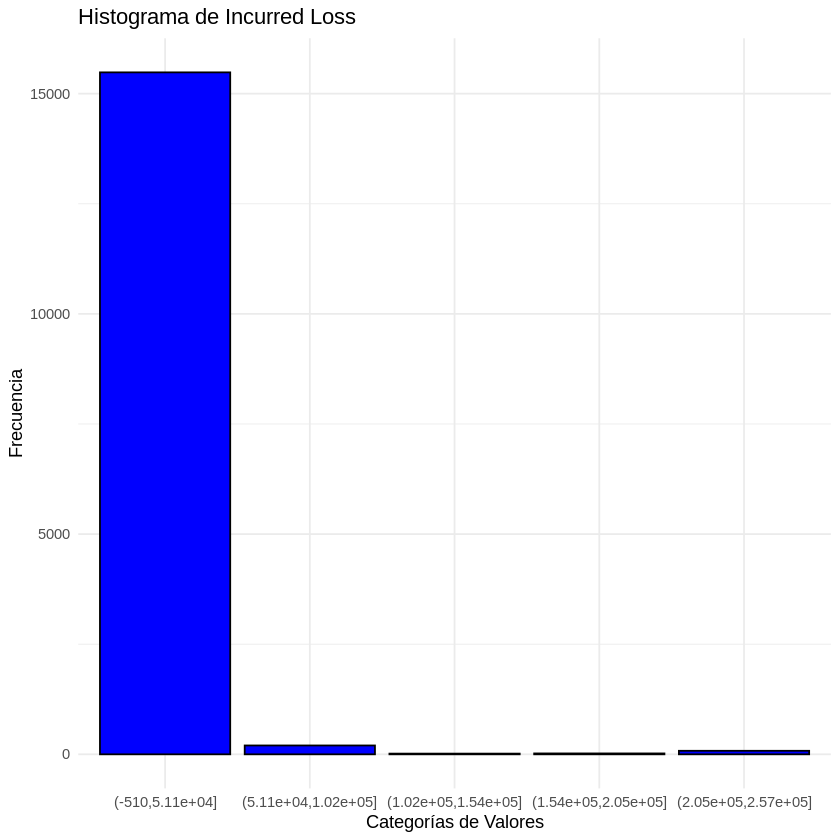

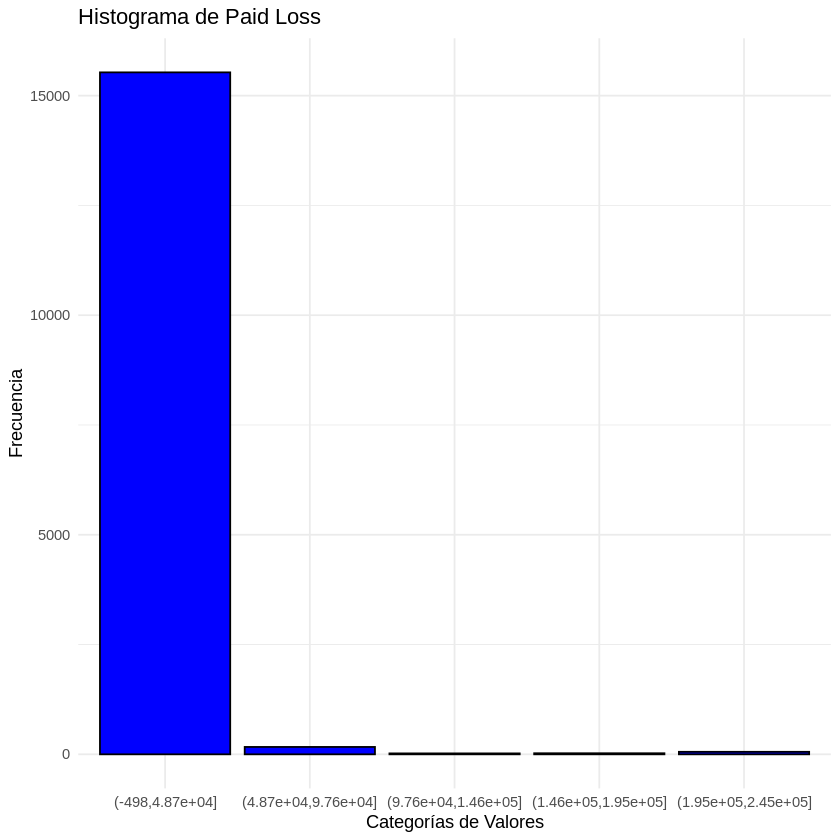

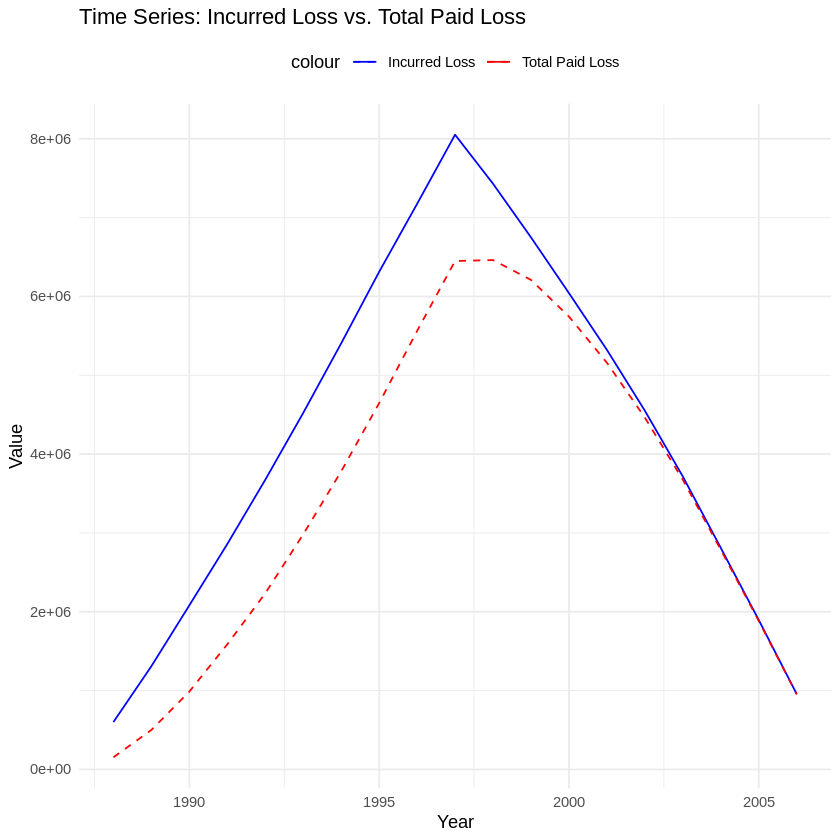

In [ ]:
intervalos <- cut(AutoComercial$IncurLoss_C, breaks = 5)

# Crear un histograma con ggplot2
ggplot(data = AutoComercial, aes(x = intervalos)) +
  geom_bar(fill = "blue", color = "black") +
  labs(title = "Histograma de Incurred Loss",
       x = "Categorías de Valores",
       y = "Frecuencia") +
  theme_minimal()

intervalos2 <- cut(AutoComercial$CumPaidLoss_C, breaks = 5)

# Crear un histograma con ggplot2
ggplot(data = AutoComercial, aes(x = intervalos2)) +
  geom_bar(fill = "blue", color = "black") +
  labs(title = "Histograma de Paid Loss",
       x = "Categorías de Valores",
       y = "Frecuencia") +
  theme_minimal()


ggplot(data = resumen_por_año, aes(x = DevelopmentYear)) +
  geom_line(aes(y = Incurred_Loss, color = "Incurred Loss"), linetype = "solid") +
  geom_line(aes(y = Cummulate_Paid_Loss, color = "Total Paid Loss"), linetype = "dashed") +
  labs(title = "Time Series: Incurred Loss vs. Total Paid Loss",
       x = "Year",
       y = "Value") +
  scale_color_manual(values = c("Incurred Loss" = "blue", "Total Paid Loss" = "red")) +
  scale_linetype_manual(values = c("Incurred Loss" = "solid", "Total Paid Loss" = "dashed")) +
  theme_minimal() +
  theme(legend.position = "top")

A continuación se muestra la tendencia de desarrollo con base en los siniestros ocurridos

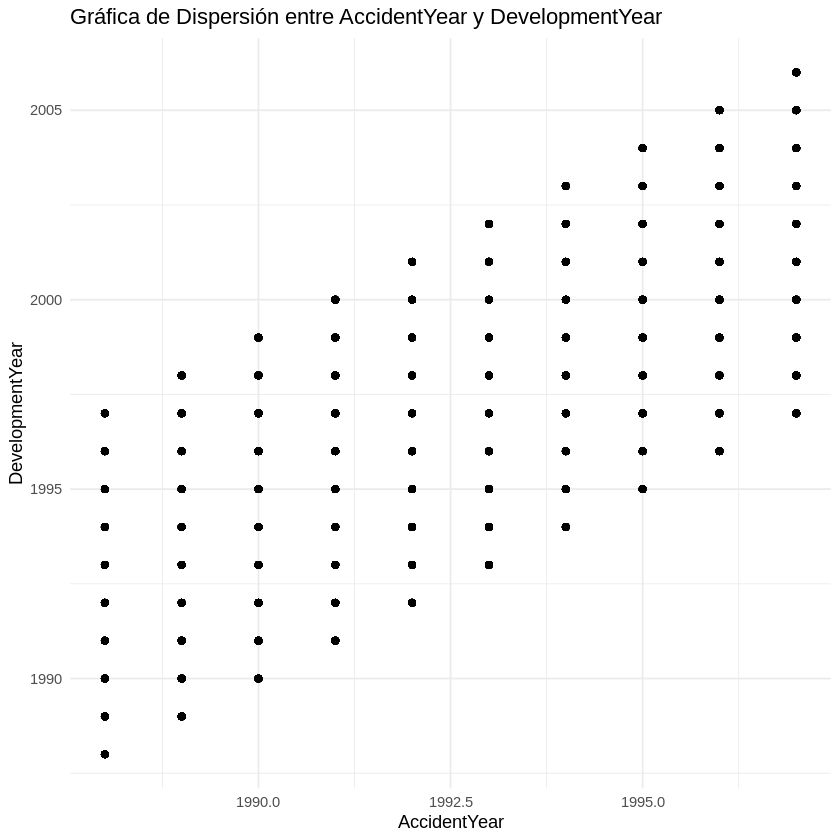

In [ ]:
ggplot(data = AutoComercial, aes(x = AccidentYear, y = DevelopmentYear)) +
  geom_point() +
  labs(title = "Gráfica de Dispersión entre AccidentYear y DevelopmentYear",
       x = "AccidentYear",
       y = "DevelopmentYear") +
  theme_minimal()

Usando la librería ChainLadder de R se puede obtener una vista de los triángulos run off. Acá se supone que la información conocida es hasta 1997 para la compañía Public Underwriters Grp.

In [ ]:
install.packages("ChainLadder")
library(ChainLadder)

AutoComercial_EJ1<-comauto_pos %>%
                    filter(GRNAME=="Public Underwriters Grp" & DevelopmentYear <= 1997)

resumen_siniestros <- aggregate(CumPaidLoss_C ~ AccidentYear + DevelopmentYear,
                                data = AutoComercial_EJ1, sum)

triangulo <- as.triangle(resumen_siniestros, origin = "AccidentYear"
                         , dev = "DevelopmentYear", value = "CumPaidLoss_C")

print(triangulo)

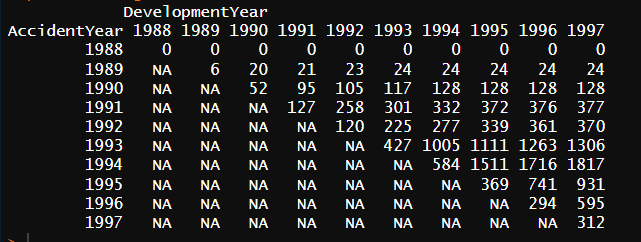

Para el reporte de calidad se realiza un análisis de valores nulos

In [ ]:
Nulos<-is.na(AutoComercial)

cantidad_nulos_por_columna <- colSums(Nulos)

tabla_nulos <- data.frame(Variable = names(cantidad_nulos_por_columna),
                          ValoresNulos = cantidad_nulos_por_columna)
print(tabla_nulos)

                           Variable ValoresNulos
GRCODE                       GRCODE            0
GRNAME                       GRNAME            0
AccidentYear           AccidentYear            0
DevelopmentYear     DevelopmentYear            0
DevelopmentLag       DevelopmentLag            0
IncurLoss_C             IncurLoss_C            0
CumPaidLoss_C         CumPaidLoss_C            0
BulkLoss_C               BulkLoss_C            0
EarnedPremDIR_C     EarnedPremDIR_C            0
EarnedPremCeded_C EarnedPremCeded_C            0
EarnedPremNet_C     EarnedPremNet_C            0
Single                       Single            0
PostedReserve97_C PostedReserve97_C            0


Un analisis de boxplot nos puede ayudar a identificar outliers en los datos:

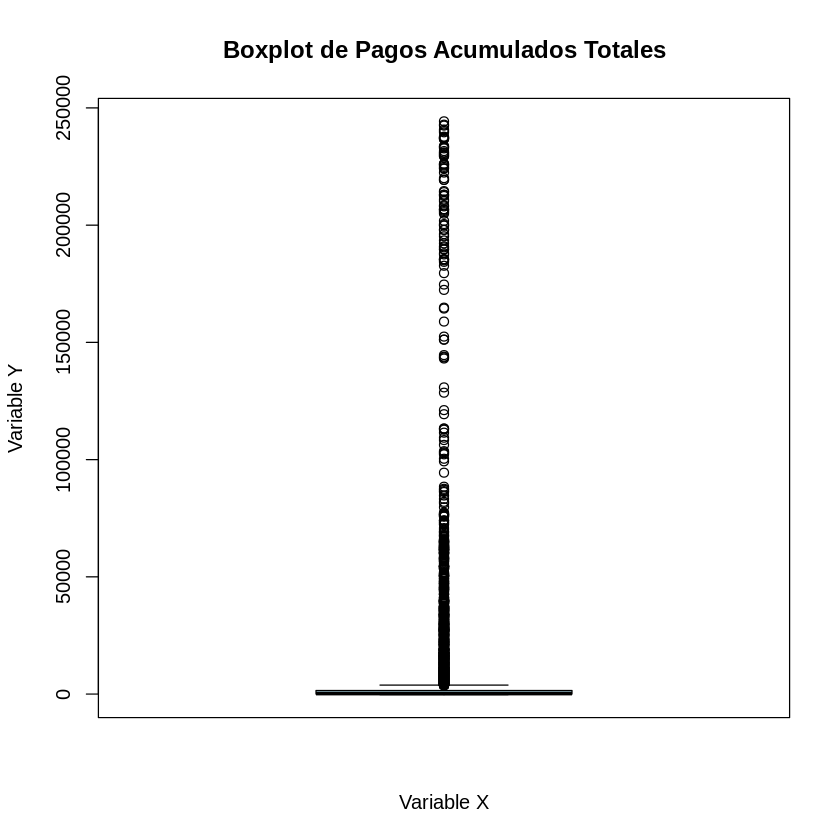

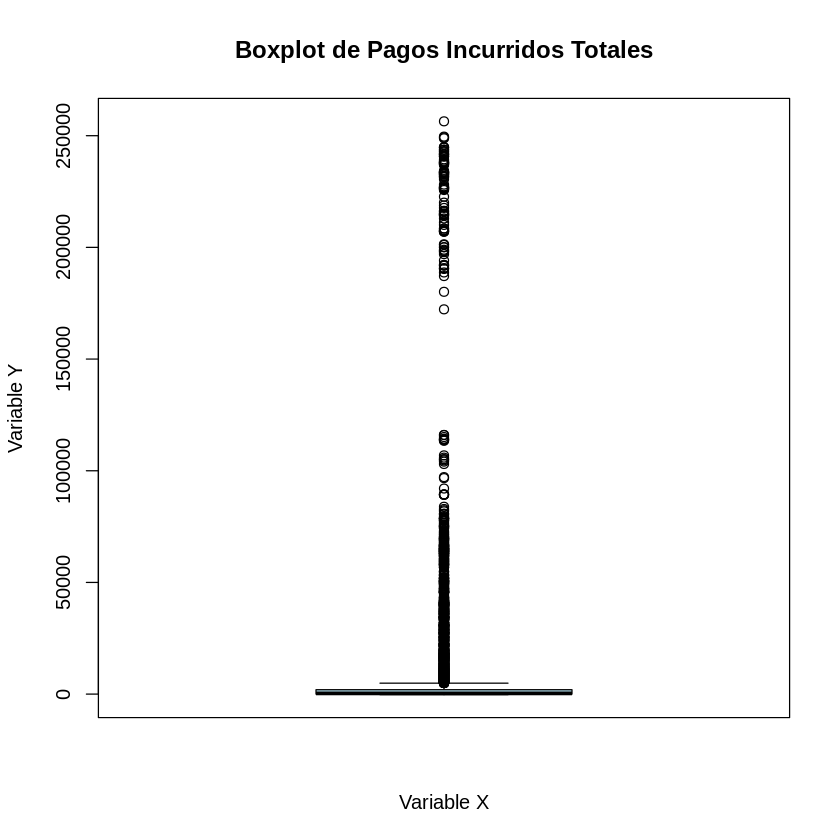

In [ ]:
boxplot(AutoComercial$CumPaidLoss_C,
        main = "Boxplot de Pagos Acumulados Totales",
        xlab = "Variable X",
        ylab = "Variable Y",
        col = "lightblue",
        border = "black",
        notch = FALSE,
        horizontal = FALSE
)

boxplot(AutoComercial$IncurLoss_C,
        main = "Boxplot de Pagos Incurridos Totales",
        xlab = "Variable X",
        ylab = "Variable Y",
        col = "lightblue",
        border = "black",
        notch = FALSE,
        horizontal = FALSE
)

Como se ha realizado la fase de entedimiento de los datos, a continuación, se muestra la fase de preparación de la información.

Primero se muestra la fase de selección de ítems. Acá se busca justificar porque se seleccionan o se descartan algunas filas dentro de la información. Debido al supuesto de existencia de informacion hasta 1997 se descartan estas filas para las variables de año de accidente y año de desarrollo

In [ ]:
AutoComercialItems<- AutoComercial %>%
                      filter(DevelopmentYear<=1997 & AccidentYear <= 1997)
str(AutoComercialItems)

spc_tbl_ [8,690 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ GRCODE           : num [1:8690] 266 266 266 266 266 266 266 266 266 266 ...
 $ GRNAME           : chr [1:8690] "Public Underwriters Grp" "Public Underwriters Grp" "Public Underwriters Grp" "Public Underwriters Grp" ...
 $ AccidentYear     : num [1:8690] 1988 1988 1988 1988 1988 ...
 $ DevelopmentYear  : num [1:8690] 1988 1989 1990 1991 1992 ...
 $ DevelopmentLag   : num [1:8690] 1 2 3 4 5 6 7 8 9 10 ...
 $ IncurLoss_C      : num [1:8690] 0 0 0 0 0 0 0 0 0 0 ...
 $ CumPaidLoss_C    : num [1:8690] 0 0 0 0 0 0 0 0 0 0 ...
 $ BulkLoss_C       : num [1:8690] 0 0 0 0 0 0 0 0 0 0 ...
 $ EarnedPremDIR_C  : num [1:8690] 0 0 0 0 0 0 0 0 0 0 ...
 $ EarnedPremCeded_C: num [1:8690] 0 0 0 0 0 0 0 0 0 0 ...
 $ EarnedPremNet_C  : num [1:8690] 0 0 0 0 0 0 0 0 0 0 ...
 $ Single           : num [1:8690] 0 0 0 0 0 0 0 0 0 0 ...
 $ PostedReserve97_C: num [1:8690] 932 932 932 932 932 932 932 932 932 932 ...
 - attr(*, "spec")=
  .. cols(
  .. 

Otra información a excluir es aquella en la que el triangulo de pagos sea conformado por ceros, es decir, un mundo sin pagos, estos se muestran a continuación

In [ ]:

AutoComercialItems1 <- AutoComercialItems %>%
  filter(CumPaidLoss_C != 0)

AutoComercialItems1

GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_C,CumPaidLoss_C,BulkLoss_C,EarnedPremDIR_C,EarnedPremCeded_C,EarnedPremNet_C,Single,PostedReserve97_C
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
266,Public Underwriters Grp,1989,1989,1,22,6,6,25,0,25,0,932
266,Public Underwriters Grp,1989,1990,2,24,20,1,25,0,25,0,932
266,Public Underwriters Grp,1989,1991,3,21,21,0,25,0,25,0,932
266,Public Underwriters Grp,1989,1992,4,24,23,0,25,0,25,0,932
266,Public Underwriters Grp,1989,1993,5,25,24,0,25,0,25,0,932
266,Public Underwriters Grp,1989,1994,6,25,24,0,25,0,25,0,932
266,Public Underwriters Grp,1989,1995,7,24,24,0,25,0,25,0,932
266,Public Underwriters Grp,1989,1996,8,24,24,0,25,0,25,0,932
266,Public Underwriters Grp,1989,1997,9,24,24,0,25,0,25,0,932


También se eliminan los montos negativos del conjunto de datos

In [ ]:
AutoComercialItems2 <- AutoComercialItems1 %>%
  filter(CumPaidLoss_C > 0)

AutoComercialItems2

GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_C,CumPaidLoss_C,BulkLoss_C,EarnedPremDIR_C,EarnedPremCeded_C,EarnedPremNet_C,Single,PostedReserve97_C
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
266,Public Underwriters Grp,1989,1989,1,22,6,6,25,0,25,0,932
266,Public Underwriters Grp,1989,1990,2,24,20,1,25,0,25,0,932
266,Public Underwriters Grp,1989,1991,3,21,21,0,25,0,25,0,932
266,Public Underwriters Grp,1989,1992,4,24,23,0,25,0,25,0,932
266,Public Underwriters Grp,1989,1993,5,25,24,0,25,0,25,0,932
266,Public Underwriters Grp,1989,1994,6,25,24,0,25,0,25,0,932
266,Public Underwriters Grp,1989,1995,7,24,24,0,25,0,25,0,932
266,Public Underwriters Grp,1989,1996,8,24,24,0,25,0,25,0,932
266,Public Underwriters Grp,1989,1997,9,24,24,0,25,0,25,0,932


A continuación, se muestra una tabla de las medias por compañía

In [ ]:
Promedios <- AutoComercialItems2 %>%
  group_by(GRNAME) %>%
  summarize(Promedio_CumPaidLoss_C = mean(CumPaidLoss_C, na.rm = TRUE))
Promedios


GRNAME,Promedio_CumPaidLoss_C
<chr>,<dbl>
Aegis Grp,19.142857
Agway Ins Co,352.181818
Alaska Nat Ins Co,1787.181818
Alliance Mut Ins Co,51.750000
American Contractors Ins Grp,432.339623
American Hallmark Ins Co Of TX,9.947368
American Mining Ins Co Inc,119.750000
American Modern Ins Grp Inc,488.733333
American Resources Ins Co Inc,244.636364


La tecnica de imputación usada contempla el método de z-score acá se establece un criterio de atípicos y se reemplaza por la media aquellos que salen de un umbral definido

In [ ]:
AutoComercialItems3 <- AutoComercialItems2 %>% #Join para unir tablas de promedios y la principal
  left_join(Promedios, by = c("GRNAME"="GRNAME"))


AutoComercialItems4<-AutoComercialItems3 %>%
  mutate(z_score = (CumPaidLoss_C - Promedio_CumPaidLoss_C) / sd(CumPaidLoss_C, na.rm = TRUE))

AutoComercialItems5<- AutoComercialItems4 %>%
  mutate(umbral_z = 0.05) #Ajustar de acuerdo a resultados

# Reemplazar valores atípicos
AutoComercialItems6 <- AutoComercialItems5 %>%
  mutate(CumPaidLoss_C = ifelse(abs(z_score) > umbral_z, Promedio_CumPaidLoss_C, CumPaidLoss_C))


AutoComercialItems6









GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_C,CumPaidLoss_C,BulkLoss_C,EarnedPremDIR_C,EarnedPremCeded_C,EarnedPremNet_C,Single,PostedReserve97_C,Promedio_CumPaidLoss_C,z_score,umbral_z
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
266,Public Underwriters Grp,1989,1989,1,22,6,6,25,0,25,0,932,419.7333,-0.024051769,0.05
266,Public Underwriters Grp,1989,1990,2,24,20,1,25,0,25,0,932,419.7333,-0.023237900,0.05
266,Public Underwriters Grp,1989,1991,3,21,21,0,25,0,25,0,932,419.7333,-0.023179767,0.05
266,Public Underwriters Grp,1989,1992,4,24,23,0,25,0,25,0,932,419.7333,-0.023063500,0.05
266,Public Underwriters Grp,1989,1993,5,25,24,0,25,0,25,0,932,419.7333,-0.023005366,0.05
266,Public Underwriters Grp,1989,1994,6,25,24,0,25,0,25,0,932,419.7333,-0.023005366,0.05
266,Public Underwriters Grp,1989,1995,7,24,24,0,25,0,25,0,932,419.7333,-0.023005366,0.05
266,Public Underwriters Grp,1989,1996,8,24,24,0,25,0,25,0,932,419.7333,-0.023005366,0.05
266,Public Underwriters Grp,1989,1997,9,24,24,0,25,0,25,0,932,419.7333,-0.023005366,0.05


La estructura final de la base de datos es la siguiente

In [ ]:
AutoComercialFinal <- AutoComercialItems6 %>%
                    select(GRCODE, GRNAME, AccidentYear, DevelopmentYear,CumPaidLoss_C, IncurLoss_C)

View(AutoComercialFinal)

GRCODE,GRNAME,AccidentYear,DevelopmentYear,CumPaidLoss_C,IncurLoss_C
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
266,Public Underwriters Grp,1989,1989,6,22
266,Public Underwriters Grp,1989,1990,20,24
266,Public Underwriters Grp,1989,1991,21,21
266,Public Underwriters Grp,1989,1992,23,24
266,Public Underwriters Grp,1989,1993,24,25
266,Public Underwriters Grp,1989,1994,24,25
266,Public Underwriters Grp,1989,1995,24,24
266,Public Underwriters Grp,1989,1996,24,24
266,Public Underwriters Grp,1989,1997,24,24
